## Task 1

In [64]:
# Importing regular expression to work with pattern in the file
import re 
# Importing matplotlib to draw graphs (later)
import matplotlib.pyplot as plt


In [65]:
# I will start by opening the text file in 'r' (read) mode
# Saving the text file to a variable for comfort
dna_path = "dna_raw.txt"

# Using the "with open" statement to automatacally close the file 
with open(dna_path, 'r') as f_read:
    dnas = f_read.read().upper() # using the upper() method to make all letters small
    print(dnas)

>SEQ1
CGTAACCAATAAAAAAACAAGCTTAACCTAATTC
>SEQ2
AGCTTAGTTTGGATCTGGCCGGGG
>SEQ3
GCGGATTTACTCCCCCCAAAAANNAGGGGAGAGCCCAGATAAATGGAGTCTGTGCGTCCACA
>SEQ4
GCGGATTTACTCAGGGGAGAGCCCAGGGATAAATGGAGTCTGTGCGTCCACA


### Create dictionary


In [66]:
with open(dna_path, 'r') as f_read:
    # Using splitlines method to split the string into a list to divied each line to an item
    lines = f_read.read().splitlines()
    #print(lines)

    # Creating a variable and assignes it a 'None' value (null) to add the titels (keys)
    empty_key = None
    # I create a empty dictionaryto store the 'keys' and 'value'
    seq_dict = {}

    # Now i want to loop through the list and combine 'ID' with the sequence of data (letters)
    for line in lines:
        # If the line starts with '>' and therefor is a title, i put it into the variable "empty_key"
        # and then add "empty_key" as a 'key' to the dictionary
        if line.startswith('>'):
            empty_key = line[1:] #1: removes '>', just looks better
            seq_dict[empty_key] = ""
        
        # If the line doesn't starts with '>' and therefor is the letters, its added to the dictionary är 'value'
        else:
            seq_dict[empty_key] += line

    
    # Prints it out to see how it looks
    for key, value in seq_dict.items():
        print(key)
        print(value)

SEQ1
CGTAACCAATAAAAAAACAAGCTTAACCTAATTC
SEQ2
AGCTTAGTTTGGATCTGGCCGGGG
SEQ3
GCGGATTTACTCCCCCCAAAAANNAGGGGAGAGCCCAGATAAATGGAGTCTGTGCGTCCACA
SEQ4
GCGGATTTACTCAGGGGAGAGCCCAGGGATAAATGGAGTCTGTGCGTCCACA


### Count the letters


In [67]:
# I import Counter (a subclass for dict, tip from Geeksforgeeks) 
from collections import Counter

# I create dictionarys to store key and values from each sequence
dict1 = {}
dict2 = {}
dict3 = {}
dict4 = {}

try:
    # I loop through the dictionary and for each 'sec_id' (key) and 'letters' (value) in the dictionary, 
    # each item gets a index (starting from 0) using.. 
    # .. enumerate(..) adds an index (i) to each pair so that i = 0 (seq_id = 'seq1', letters = 'ACGAT..') etc
    # I use the items() to return a list containing a tuple for each key value pair ex. [(key1, value1)]
    for i, (seq_id, letters) in enumerate(seq_dict.items()):
        
        # Then i use 'Counter' to count each letter in the string 'letters'
        # Saves the counted letters in 'count'
        count = Counter(letters)
        
        # Then a use if and elif to add each key and value to its own dictionary
        # so that the letters become keys, and the numbers become values.
        if i == 0:
            dict1 = dict(count)
        elif i == 1:
            dict2 = dict(count)
        elif i == 2:
            dict3 = dict(count)
        elif i == 3:
            dict4 = dict(count)
    print(f"Dict 1: {dict1}\nDict 2: {dict2}\nDict 3: {dict3}\nDict 4: {dict4}")
except SyntaxError: 
    print("There was a syntax error, maybe you forgot a comma")
except:
    print("Something went wrong, check the code")

Dict 1: {'C': 8, 'G': 2, 'T': 7, 'A': 17}
Dict 2: {'A': 3, 'G': 10, 'C': 4, 'T': 7}
Dict 3: {'G': 16, 'C': 16, 'A': 18, 'T': 10, 'N': 2}
Dict 4: {'G': 18, 'C': 11, 'A': 13, 'T': 10}


### Plot bar charts


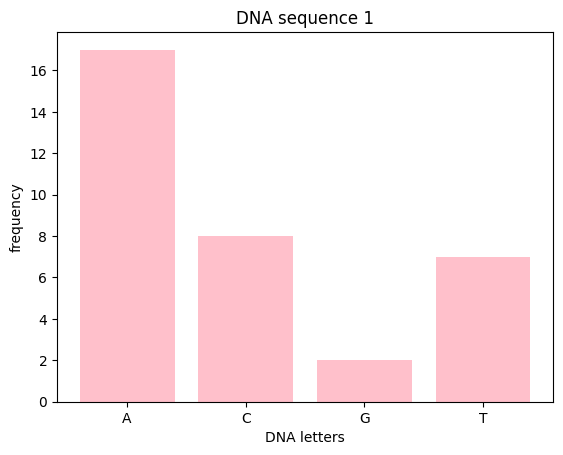

In [68]:
# I wanted my bar charts to be in alphabetically order so I used the 
# sorted() function tp sort my dictionary before creating 'x' and 'y'
dict_1 = dict(sorted(dict1.items())) 
# I convert my dict to a list and assign the key (the letters) from 'dict1' to 'x'
x = list(dict_1.keys())
# and the value from 'dict1' to 'y'
y = list(dict_1.values())

# Then i do plt.bar to get a bar chart with the value of x and y, color is just for fun
plt.bar(x, y, color = "pink")

plt.title("DNA sequence 1")
plt.xlabel("DNA letters")
plt.ylabel("frequency")
plt.show()


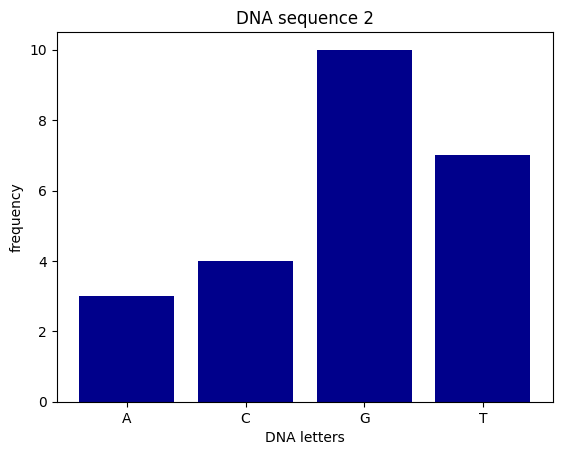

In [69]:
dict_2 = dict(sorted(dict2.items())) 

x = list(dict_2.keys())
y = list(dict_2.values())

plt.bar(x, y, color = "darkblue")

plt.title("DNA sequence 2")
plt.xlabel("DNA letters")
plt.ylabel("frequency")
plt.show()

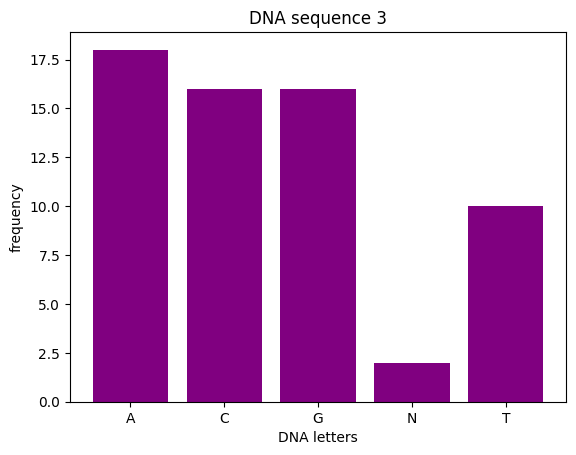

In [70]:
dict_3 = dict(sorted(dict3.items())) 

x = list(dict_3.keys())
y = list(dict_3.values())

plt.bar(x, y, color = "purple")

plt.title("DNA sequence 3")
plt.xlabel("DNA letters")
plt.ylabel("frequency")
plt.show()

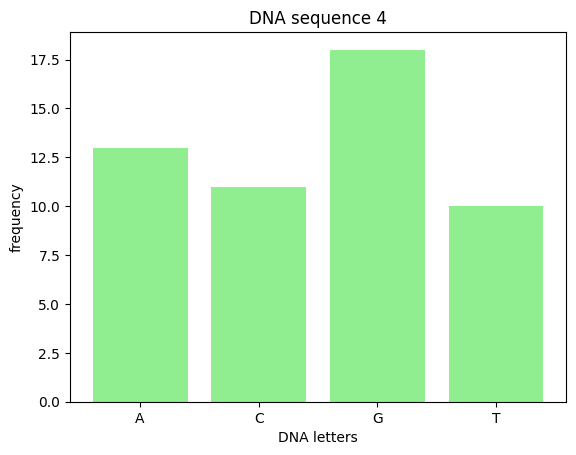

In [71]:
dict_4 = dict(sorted(dict4.items())) 

x = list(dict_4.keys())
y = list(dict_4.values())

plt.bar(x, y, color = "lightgreen")

plt.title("DNA sequence 4")
plt.xlabel("DNA letters")
plt.ylabel("frequency")
plt.show()

## Task 2
function to receive and clean up txt-file

In [72]:
# I start by creating the 'function'
def seq_file(filename):
    # Then i create an empty dictionary (like before) to store the keys (titels) and values (letters)
    text_dict = {} 
    # and a variable assigned a 'null value' to store keys
    text_key = None 

    # I open the txt-file in read mode
    with open(filename, 'r') as f: 
        # To avoid issuse I make all letters in the file to upper() and 
        # splitlines() to make every line a seperate line
        file_text = f.read().upper().splitlines() 
        
        # Then i loop through each line in the text file
        for i in file_text: 
            # I use the startswith()-method to see if the line starts with '>',
            # and therefor is a title. 
            if i.startswith('>'): 
                text_key = i[1:] # i[1:] to remove '>' (just to make it look better)
                # Adding each "title" (key) to the dictionary and saving it as a key by: 
                text_dict[text_key] = "" # the value is empty for now
                
            else:
                # If the line doesn't starts with '>' then its (hopefully) the lines with letters
                # and then its added to the dictionary as a value
                text_dict[text_key] += i.strip()#strip() is just to remove (if there's any) spaces

        # Then I want to return the dictionary back to my function 
    return text_dict

        
# Testing with the "dna_raw_complicated"- textfile 
seq_file("dna_raw_complicated.txt")
    

    #IT WORKS, YEY ME!
        

       
        


{'SEQ1': 'CGTAACCAATAAAAAAACAAGCTTAACCTAATTC',
 'SEQ2': 'AGCTTAGTTTGGATCTGGCCGGGG',
 'SEQ3': 'GCGGATTTACTCCCCCCAAAAANNAGGGGAGAGCCCAGATAAATGGAGTCTGTGCGTCCACAGAATTCGCACCAAATAAAACCTCACCCATAGAGCCCAGAATTTACTCCCC',
 'SEQ4': 'GCGGATTTACTCAGGGGAGAGCCCAGGGATAAATGGAGTCTGTGCGTCCACAGAATTCGCACCA'}

### function for "plotting"

{'A': 17, 'C': 8, 'G': 2, 'T': 7}


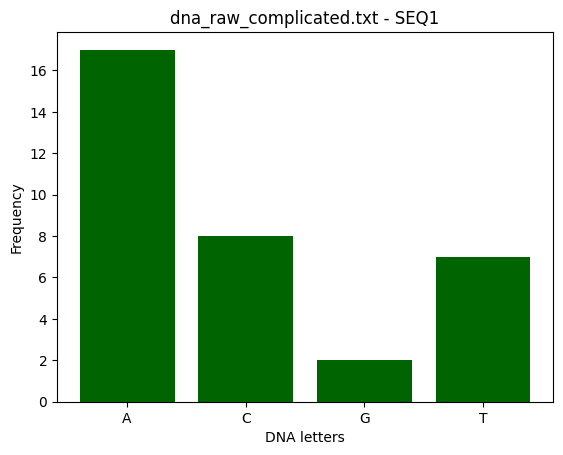

{'A': 3, 'C': 4, 'G': 10, 'T': 7}


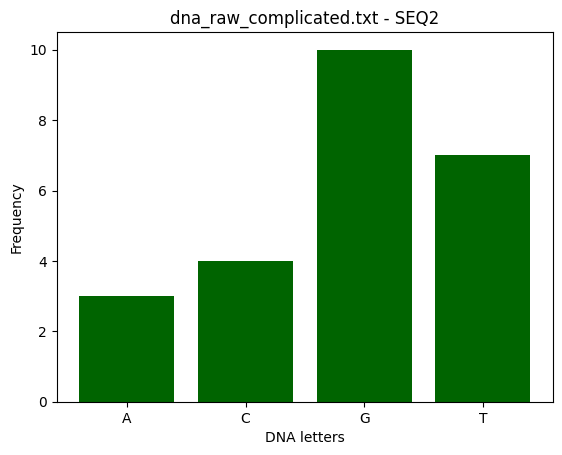

{'A': 36, 'C': 34, 'G': 21, 'N': 2, 'T': 19}


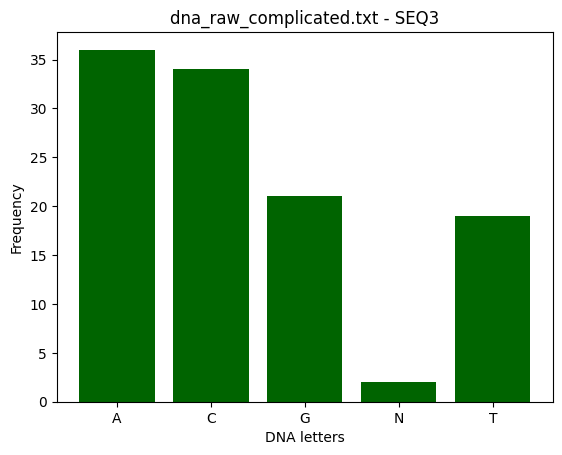

{'A': 17, 'C': 15, 'G': 20, 'T': 12}


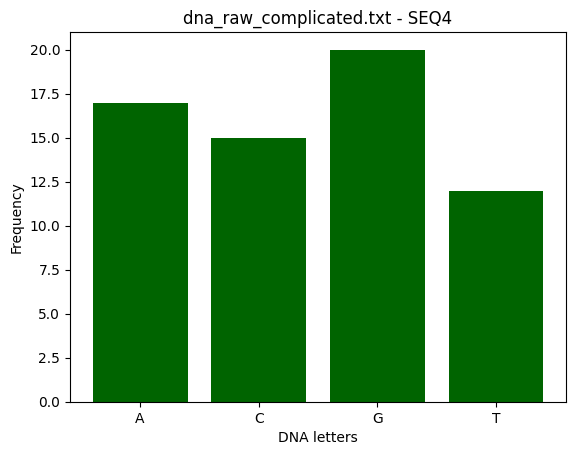

In [ ]:
# I create a function that receives two arguments,  
# the second (file_name) one is just to show the name of the file (its not really necessary) 
def plot_dict(dna_dict, file_name=""):
    
    # I use a for-loop (like in task1) to loop through each key and value in the dictionary,
    # and give each key and value an index
    for i, (seq_ids, letter) in enumerate(dna_dict.items()):
        # counts each letter in value
        count = Counter(letter)

        # Here i sort my dictionary to get the letters in alphabetically order 
        # this time, iside of the loop insted of saving each key, value pair in its own dictionary 
        # and THEN sort them one by one 
        sorted_dict = dict(sorted(count.items())) 

        # I wanted to se the counted letters to know it was right
        print(sorted_dict)

        # Assigne the "keys" (titels) to 'x', and the values (letters) to 'y' 
        x = list(sorted_dict.keys()) 
        y = list(sorted_dict.values()) 

        # Creating a bar chart with 'x' and 'y', giving it a color 
        plt.bar(x, y, color = "darkgreen") 
        # (A little bit sad I could't (don't know how to) get different colors)

        # Using the 'file_name' in the titel to show what file it is, 
        # and 'seq_ids' which sequence were on 
        plt.title(f"{file_name} - {seq_ids}") 
        plt.xlabel("DNA letters") 
        plt.ylabel("Frequency") 
        plt.show() 



# Here I test with the "dna_raw_complicated.txt"-file: 
# First I just tried:
# plot_dict(seq_file) because i already put in the textfile into that function,
# I tried different ways to solv it and couldn't fint the solution so I asked LLM for help

# I read in "dna_raw_complicated.txt" with 'filename' from 'seq_file'
filename = "dna_raw_complicated.txt" 
# Here i'm "getting" my function from above and storing the result from that function in a variable
seq_data = seq_file(filename) 
# Then I "send" the dictionary (text_dict) from 'seq_file' to this function (plot_dict)
# and assigne the 'file_name' to 'filename' ("dna_raw_complicated.txt") 
plot_dict(seq_data, file_name = filename) 









